In [1]:
import utils
from creating import pendulum, harmonic_oscillator, kepler_problem, double_pendulum, coupled_oscillator
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [4]:
from creating import pendulum, harmonic_oscillator, kepler_problem, double_pendulum, coupled_oscillator

data_p, _ = pendulum.create_trajectories(200)
dist_matrix_p = utils.gen_unbiased_dist_matrix(data_p, N_points=4000)
np.savetxt("dist_matrix_p.csv", dist_matrix_p)
data_ho, _ = harmonic_oscillator.create_trajectories(200)
dist_matrix_ho = utils.gen_unbiased_dist_matrix(data_ho, N_points=4000)
np.savetxt("dist_matrix_ho.csv", dist_matrix_ho)
data_kp, _, __, ___ = kepler_problem.create_trajectories(200)
dist_matrix_kp = utils.gen_unbiased_dist_matrix(data_kp, N_points=4000)
np.savetxt("dist_matrix_kp.csv", dist_matrix_kp)
data_dp, _, __, ___ = double_pendulum.create_trajectories(200)
dist_matrix_dp = utils.gen_unbiased_dist_matrix(data_dp, N_points=4000)
np.savetxt("dist_matrix_dp.csv", dist_matrix_dp)
data_co, _, __ = coupled_oscillator.create_trajectories(200)
dist_matrix_co = utils.gen_unbiased_dist_matrix(data_co, N_points=4000)
np.savetxt("dist_matrix_co.csv", dist_matrix_co)

100%|██████████| 200/200 [09:27<00:00,  2.84s/it]
200it [00:00, 12800.98it/s]
100%|██████████| 200/200 [12:45<00:00,  3.83s/it]


In [5]:
from scipy.spatial import distance_matrix

def scores(dist_matrix, n_dims_arr=np.arange(1, 5), n_trajectories=20):
    random_trajectories = np.random.choice(np.arange(dist_matrix.shape[0]), replace=False, size=n_trajectories)
    initial_orders = np.argsort(np.argsort(dist_matrix[random_trajectories]))
    scores_lst = []
    for n_dims in n_dims_arr:
        embedder = Isomap(n_components=n_dims, metric="precomputed")
        embedding = embedder.fit_transform(dist_matrix)
        embedding_orders = np.argsort(np.argsort(distance_matrix(embedding[random_trajectories], embedding)))
        score = np.abs(initial_orders - embedding_orders).mean()
        scores_lst.append(score)
    return scores_lst

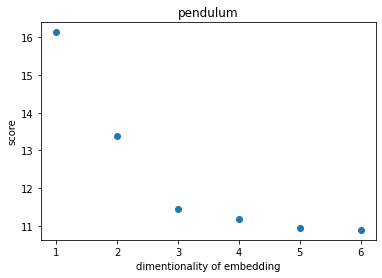

In [27]:
plt.scatter(np.arange(1, 7), scores(utils.gen_dist_matrix(data_p), np.arange(1, 7)))
plt.xlabel("dimentionality of embedding")
plt.ylabel("score")
plt.title("pendulum")
plt.show()

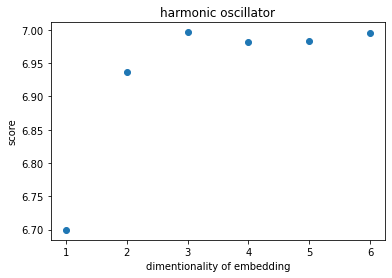

In [26]:
plt.scatter(np.arange(1, 7), scores(utils.gen_dist_matrixst_matrix(data_ho), np.arange(1, 7)))
plt.xlabel("dimentionality of embedding")
plt.ylabel("score")
plt.title("harmonic oscillator")
plt.show()

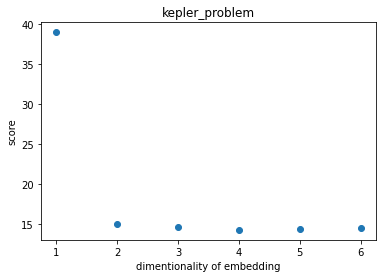

In [25]:
plt.scatter(np.arange(1, 7), scores(utils.gen_dist_matrix(data_kp), np.arange(1, 7)))
plt.xlabel("dimentionality of embedding")
plt.ylabel("score")
plt.title("kepler_problem")
plt.show()

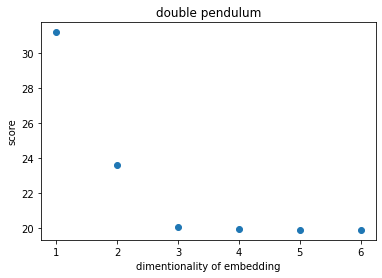

In [24]:
plt.scatter(np.arange(1, 7), scores(utils.gen_dist_matrix(data_dp), np.arange(1, 7)))
plt.xlabel("dimentionality of embedding")
plt.ylabel("score")
plt.title("double pendulum")
plt.show()

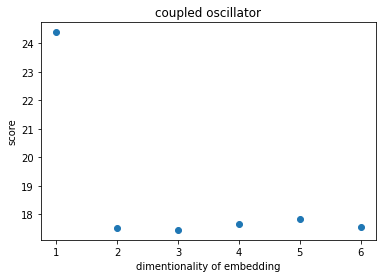

In [23]:
plt.scatter(np.arange(1, 7), scores(utils.gen_dist_matrix(data_co), np.arange(1, 7)))
plt.xlabel("dimentionality of embedding")
plt.ylabel("score")
plt.title("coupled oscillator")
plt.show()